<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.362787,32.232776,0.180942,87.776504,87.573380,0.203124
1,0.0,1.0,43.063711,57.205304,-0.076950,110.192065,110.249775,-0.057710
2,0.0,2.0,24.513644,85.602207,-0.147950,119.967901,120.106166,-0.138265
3,0.0,3.0,56.965095,40.491707,-0.015268,107.441534,107.430775,0.010759
4,0.0,4.0,72.416978,73.842628,-0.125201,156.134405,156.230289,-0.095884
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.363025,22.497070,0.156465,88.016560,87.830919,0.185641
119996,999.0,116.0,66.471798,40.974300,0.446509,117.892606,117.426942,0.465664
119997,999.0,117.0,36.404920,75.556423,-0.361180,121.600163,121.969425,-0.369262
119998,999.0,118.0,51.543579,78.403571,0.043951,139.991101,139.954537,0.036564


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.362787,32.232776,0.180942,87.776504,87.573380,0.203124
1,0.0,1.0,43.063711,57.205304,-0.076950,110.192065,110.249775,-0.057710
2,0.0,2.0,24.513644,85.602207,-0.147950,119.967901,120.106166,-0.138265
3,0.0,3.0,56.965095,40.491707,-0.015268,107.441534,107.430775,0.010759
4,0.0,4.0,72.416978,73.842628,-0.125201,156.134405,156.230289,-0.095884
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.363025,22.497070,0.156465,88.016560,87.830919,0.185641
119996,999.0,116.0,66.471798,40.974300,0.446509,117.892606,117.426942,0.465664
119997,999.0,117.0,36.404920,75.556423,-0.361180,121.600163,121.969425,-0.369262
119998,999.0,118.0,51.543579,78.403571,0.043951,139.991101,139.954537,0.036564


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    45.362787  32.232776  0.180942   87.776504   87.573380  0.203124
      1.0    43.063711  57.205304 -0.076950  110.192065  110.249775 -0.057710
      2.0    24.513644  85.602207 -0.147950  119.967901  120.106166 -0.138265
      3.0    56.965095  40.491707 -0.015268  107.441534  107.430775  0.010759
      4.0    72.416978  73.842628 -0.125201  156.134405  156.230289 -0.095884
...                ...        ...       ...         ...         ...       ...
999.0 115.0  55.363025  22.497070  0.156465   88.016560   87.830919  0.185641
      116.0  66.471798  40.974300  0.446509  117.892606  117.426942  0.465664
      117.0  36.404920  75.556423 -0.361180  121.600163  121.969425 -0.369262
      118.0  51.543579  78.403571  0.043951  139.991101  139.954537  0.036564
      119.0  79.559321  54.174676 -0.113524  143.620473  143.721142 -0.100669

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    45.362787  32.232776  0.180942   87.776504   87.573380  0.203124
      1.0    43.063711  57.205304 -0.076950  110.192065  110.249775 -0.057710
      2.0    24.513644  85.602207 -0.147950  119.967901  120.106166 -0.138265
      3.0    56.965095  40.491707 -0.015268  107.441534  107.430775  0.010759
      4.0    72.416978  73.842628 -0.125201  156.134405  156.230289 -0.095884
...                ...        ...       ...         ...         ...       ...
999.0 115.0  55.363025  22.497070  0.156465   88.016560   87.830919  0.185641
      116.0  66.471798  40.974300  0.446509  117.892606  117.426942  0.465664
      117.0  36.404920  75.556423 -0.361180  121.600163  121.969425 -0.369262
      118.0  51.543579  78.403571  0.043951  139.991101  139.954537  0.036564
      119.0  79.559321  54.174676 -0.113524  143.620473  143.721142 -0.100669

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.362787,32.232776,0.180942,87.776504,87.573380,0.203124
1,0.0,1.0,43.063711,57.205304,-0.076950,110.192065,110.249775,-0.057710
2,0.0,2.0,24.513644,85.602207,-0.147950,119.967901,120.106166,-0.138265
3,0.0,3.0,56.965095,40.491707,-0.015268,107.441534,107.430775,0.010759
4,0.0,4.0,72.416978,73.842628,-0.125201,156.134405,156.230289,-0.095884
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.363025,22.497070,0.156465,88.016560,87.830919,0.185641
119996,999.0,116.0,66.471798,40.974300,0.446509,117.892606,117.426942,0.465664
119997,999.0,117.0,36.404920,75.556423,-0.361180,121.600163,121.969425,-0.369262
119998,999.0,118.0,51.543579,78.403571,0.043951,139.991101,139.954537,0.036564


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    45.362787  32.232776  0.180942   87.776504   87.573380  0.203124
      1.0    43.063711  57.205304 -0.076950  110.192065  110.249775 -0.057710
      2.0    24.513644  85.602207 -0.147950  119.967901  120.106166 -0.138265
      3.0    56.965095  40.491707 -0.015268  107.441534  107.430775  0.010759
      4.0    72.416978  73.842628 -0.125201  156.134405  156.230289 -0.095884
...                ...        ...       ...         ...         ...       ...
999.0 115.0  55.363025  22.497070  0.156465   88.016560   87.830919  0.185641
      116.0  66.471798  40.974300  0.446509  117.892606  117.426942  0.465664
      117.0  36.404920  75.556423 -0.361180  121.600163  121.969425 -0.369262
      118.0  51.543579  78.403571  0.043951  139.991101  139.954537  0.036564
      119.0  79.559321  54.174676 -0.113524  143.620473  143.721142 -0.100669

[120000 rows x 6 columns]

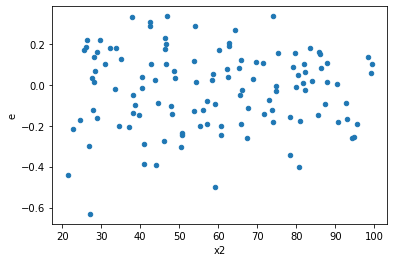

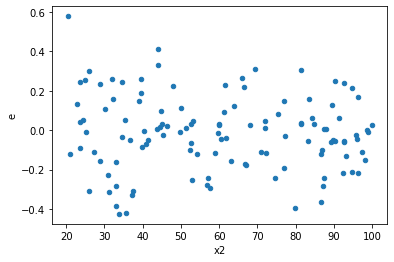

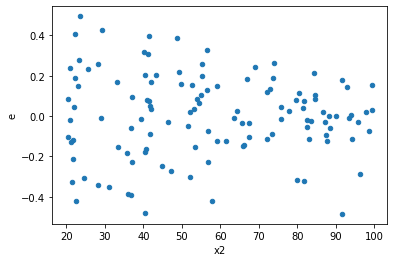

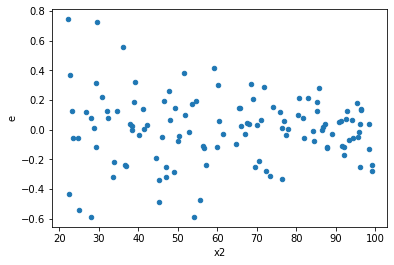

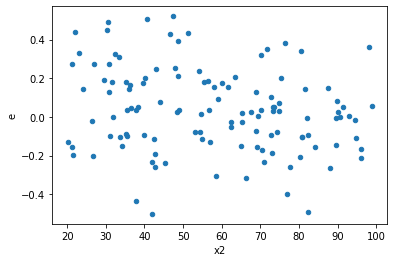

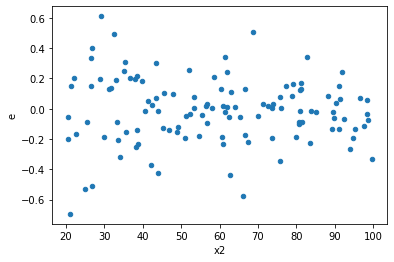

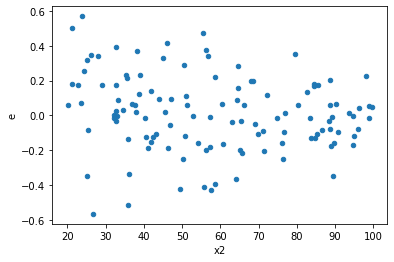

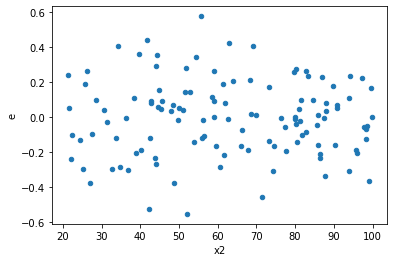

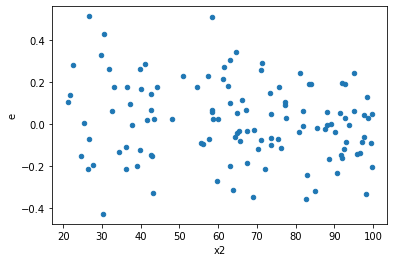

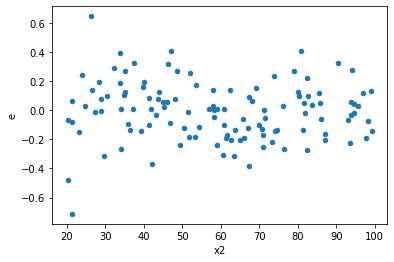

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
14.0,46.0,46.0,1.4642457319399198,1.4939726893007075,0.031831428955215645,0.03247766715871103,1.0203018910776702,0.9459547452763926,0.5270226273618037,0.4729773726381963,Reject001=1 : Homoscedasticity
43.0,46.0,46.0,1.7115000362577804,1.7294424705193838,0.03720652252734305,0.03759657544607356,1.0104834553791975,0.9719407392090149,0.5140296303954925,0.48597036960450746,Reject001=1 : Homoscedasticity
62.0,46.0,46.0,1.7243859124579215,1.7323005894692698,0.03748665027082438,0.037658708466723256,1.0045898525116497,0.9876770305090941,0.506161484745453,0.49383851525454703,Reject001=1 : Homoscedasticity
64.0,46.0,46.0,1.9177941283202338,2.1291085164419115,0.041691176702613776,0.04628496774873721,1.11018616909979,0.7244858927950069,0.6377570536024966,0.36224294639750343,Reject001=1 : Homoscedasticity
71.0,46.0,46.0,1.6763684129619922,1.7257110004981544,0.036442791586130265,0.037515456532568575,1.029434214552503,0.9220588581465425,0.5389705709267287,0.46102942907327127,Reject001=1 : Homoscedasticity
73.0,46.0,46.0,1.9776812721906594,2.2016661105391515,0.04299307113457955,0.04786230675085112,1.1132562872987042,0.7175181839530329,0.6412409080234835,0.35875909197651645,Reject001=1 : Homoscedasticity
77.0,46.0,46.0,1.3717354587363606,1.4240067822443518,0.0298203360594861,0.03095666917922504,1.038105979673474,0.899627915428802,0.550186042285599,0.449813957714401,Reject001=1 : Homoscedasticity
86.0,46.0,46.0,1.9007650818341086,2.0891981736811718,0.041320980039871925,0.045417351601764605,1.0991353921891485,0.749916252863875,0.6250418735680625,0.3749581264319375,Reject001=1 : Homoscedasticity
116.0,46.0,46.0,1.4250548842825475,1.4622781962070563,0.030979454006142337,0.03178865643928384,1.0261206163601546,0.9306976599483652,0.5346511700258174,0.4653488299741826,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,1.7598610055419588,1.3609668165476276,0.038257847946564325,0.029586235142339733,0.7733376739764232,0.3866234950659587,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,2.0993271708022823,0.7958198819542549,0.04563754719135396,0.017300432216396846,0.37908330489054887,0.0013227810828695646,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,2.5264425227009166,1.6532946589759443,0.054922663536976446,0.03594118823860749,0.6543963078995657,0.15417789100038756,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,2.5664394792347576,1.5360929693416914,0.05579216259205995,0.033393325420471555,0.5985307589640542,0.0850943975010815,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,2.318992611257367,1.7264148145865585,0.05041288285342103,0.037530756838838226,0.7444675788123746,0.32047849286924035,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,3.302610858515737,1.1840104009826329,0.07179588822860299,0.025739356543100715,0.3585073905784807,0.0007026206756857499,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,2.792396110694376,1.3196574503339702,0.0607042632759647,0.02868820544204283,0.4725896319937988,0.012438039506480106,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,2.9678325543092328,1.036735552035744,0.06451809900672245,0.02253772939208139,0.34932413910293725,0.0005190221819559783,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,1.8780153719322241,0.983027743485278,0.04082642112896139,0.021370168336636478,0.5234396683738937,0.030403328179680528,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      818
Reject001=0 : Heteroscedasticity    182
Name: Result_test, dtype: int64